# Infraestructure Manager revenue maximization with GSA

## 0. Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from benchmarks.railway import Solution, RevenueMaximization
from benchmarks.generator import get_schedule_request, get_revenue_behaviour
from src.entities import GSA

## 1. Generate service requests

As an example, we will use the Spanish south high-speed railway corridor.



In [47]:
corridor = {"MAD": {
                "CIU": {
                    "COR": {
                        "SEV": {
                            "CAD": {}
                               },
                        "PGE": {
                            "ANT": {
                                "GRA": {},
                                "MAL": {}
                                    }
                                }
                            }
                        }
                    }
            }

In [187]:
np.random.seed(seed=28)

schedule = get_schedule_request(corridor, 8)
revenue = get_revenue_behaviour(schedule)

schedule, revenue

({1: {'CIU': [1302, 1302],
   'COR': [1364, 1369],
   'PGE': [1481, 1487],
   'ANT': [1575, 1580],
   'GRA': [1628, 1628]},
  2: {'MAD': [606, 606],
   'CIU': [679, 685],
   'COR': [797, 800],
   'SEV': [905, 912],
   'CAD': [995, 995]},
  3: {'MAD': [933, 933],
   'CIU': [1033, 1039],
   'COR': [1091, 1098],
   'SEV': [1136, 1140],
   'CAD': [1170, 1170]},
  4: {'MAD': [963, 963],
   'CIU': [1005, 1008],
   'COR': [1115, 1118],
   'PGE': [1203, 1206],
   'ANT': [1234, 1238],
   'GRA': [1281, 1281]},
  5: {'COR': [537, 537],
   'PGE': [614, 620],
   'ANT': [730, 737],
   'MAL': [762, 762]},
  6: {'PGE': [1284, 1284], 'ANT': [1388, 1392], 'MAL': [1490, 1490]},
  7: {'PGE': [980, 980], 'ANT': [1015, 1021], 'GRA': [1086, 1086]},
  8: {'MAD': [976, 976],
   'CIU': [1045, 1051],
   'COR': [1081, 1087],
   'SEV': [1131, 1137],
   'CAD': [1184, 1184]}},
 {1: {'canon': 302.5,
   'k': 1.01,
   'dt_max_penalty': 42.35,
   'tt_max_penalty': 19.66},
  2: {'canon': 302.5,
   'k': 1.13,
   'dt_max_p

In [135]:
np.random.seed(seed=28)

# Dummy schedule
schedule = {1: {'MAD': [0, 0], 'BAR': [148, 152], 'FIG': [180, 180]},
            2: {'MAD': [8, 8], 'ZAR': [28, 30], 'BAR': [165, 167], 'FIG': [210, 210]},
            3: {'MAD': [30, 30], 'BAR': [180, 182], 'FIG': [225, 225]}}

revenue = get_revenue_behaviour(schedule)

schedule, revenue

({1: {'MAD': [0, 0], 'BAR': [148, 152], 'FIG': [180, 180]},
  2: {'MAD': [8, 8], 'ZAR': [28, 30], 'BAR': [165, 167], 'FIG': [210, 210]},
  3: {'MAD': [30, 30], 'BAR': [180, 182], 'FIG': [225, 225]}},
 {1: {'canon': 222.75,
   'k': 1.05,
   'dt_max_penalty': 31.18,
   'tt_max_penalty': 28.96},
  2: {'canon': 242.0,
   'k': 1.03,
   'dt_max_penalty': 33.88,
   'tt_max_penalty': 20.97},
  3: {'canon': 198.0,
   'k': 1.18,
   'dt_max_penalty': 27.72,
   'tt_max_penalty': 25.74}})

In [188]:
sm = RevenueMaximization(schedule, revenue, safe_headway=10)

In [ ]:
sm.update_schedule(Solution(real=np.array([-3, 152, 8, 30, 167, 30, 182], dtype=float), discrete=np.array([])))
sm.updated_schedule

In [190]:
gsa_algo = GSA(objective_function=sm.get_fitness_gsa,
               is_feasible=sm.feasible_services_times,
               r_dim=len(sm.boundaries.real),
               d_dim=0,
               boundaries=sm.boundaries)

In [191]:
import cProfile as profile
import time

pr = profile.Profile()
pr.disable()

#gsa_algo.set_seed(seed=28)

pop_size = 20

start = time.time()
pr.enable()
training_history = gsa_algo.optimize(population_size=pop_size,
                                     iters=100,
                                     chaotic_constant=True,
                                     repair_solution=False,
                                     initial_population=sm.get_initial_population(pop_size))
pr.disable()
print(f"Elapsed time: {time.time() - start}")

pr.dump_stats('profile.pstat')

Initial population: [<src.entities.Solution object at 0x157a06280>, <src.entities.Solution object at 0x156ff4f70>, <src.entities.Solution object at 0x2ccc76550>, <src.entities.Solution object at 0x2bdcefcd0>, <src.entities.Solution object at 0x15784d2e0>, <src.entities.Solution object at 0x15784d250>, <src.entities.Solution object at 0x15784d490>, <src.entities.Solution object at 0x15784d5b0>, <src.entities.Solution object at 0x15784d3a0>, <src.entities.Solution object at 0x1578953d0>, <src.entities.Solution object at 0x1578499d0>, <src.entities.Solution object at 0x1578499a0>, <src.entities.Solution object at 0x157849a00>, <src.entities.Solution object at 0x157849eb0>, <src.entities.Solution object at 0x157849f10>, <src.entities.Solution object at 0x157849dc0>, <src.entities.Solution object at 0x157849e50>, <src.entities.Solution object at 0x157b05f40>, <src.entities.Solution object at 0x1576aae20>, <src.entities.Solution object at 0x1576aae50>]
GSA is optimizing  "get_fitness_gsa"
['

In [165]:
sm.best_solution.real

array([ -1., 154.,   9.,  30., 167.,  30., 188.])

In [166]:
sm.requested_schedule

{1: {'MAD': [0, 0], 'BAR': [148, 152], 'FIG': [180, 180]},
 2: {'MAD': [8, 8], 'ZAR': [28, 30], 'BAR': [165, 167], 'FIG': [210, 210]},
 3: {'MAD': [30, 30], 'BAR': [180, 182], 'FIG': [225, 225]}}

In [167]:
sm.operational_times

{1: [148, 4, 28], 2: [20, 2, 135, 2, 43], 3: [150, 2, 43]}

In [168]:
sm.boundaries.real

[[-10, 10],
 [152.0, 162],
 [-2, 18],
 [32.0, 40],
 [167.0, 177],
 [20, 40],
 [182.0, 192]]

In [169]:
sm.updated_schedule

{1: {'MAD': [2.8908167663271004e-30, 2.8908167663271004e-30],
  'BAR': [148.0, 152.0],
  'FIG': [180.0, 180.0]},
 2: {'MAD': [10.0, 10.0],
  'ZAR': [30.0, 30.0],
  'BAR': [165.0, 167.0],
  'FIG': [210.0, 210.0]},
 3: {'MAD': [30.0, 30.0], 'BAR': [180.0, 186.0], 'FIG': [229.0, 229.0]}}

In [170]:
sm.update_feasible_schedules(sm.best_solution)
sm.feasible_schedules

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [171]:
sm.best_solution.real

array([ -1., 154.,   9.,  30., 167.,  30., 188.])

In [172]:
sm.requested_times

[0, 152, 8, 30, 167, 30, 182]

In [173]:
sm.get_revenue(Solution(real=np.array([-2, 152, 8, 30, 167, 30, 182], dtype=float), discrete=np.array([1, 1, 1])))

658.6125968465075

In [174]:
sm.update_feasible_schedules(Solution(real=np.array([-2, 152, 8, 30, 167, 30, 182], dtype=float), discrete=np.array([1, 1, 1])))
sm.feasible_schedules

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [175]:
sm.best_solution.discrete

[1, 1, 1]

In [176]:
sm.get_revenue(sm.best_solution)

659.7786877646716

In [177]:
training_history

,Iteration,Fitness,Accuracy,ExecutionTime,Discrete,Real
0,0,579.758292,0,0.009603,[],"[-5.0, 155.0, 11.0, 34.0, 170.0, 40.0, 192.0]"
1,1,579.758292,0,0.023734,[],"[10.09215970191573, 158.73556989920806, 31.756..."
2,2,601.141442,0,0.036537,[],"[-10.0, 152.0, 6.0, 39.0, 168.0, 31.0, 192.0]"
3,3,607.485775,0,0.048435,[],"[-6.0, 152.0, 10.0, 32.0, 167.0, 36.0, 187.0]"
4,4,616.399213,0,0.059571,[],"[-10.0, 152.0, 10.0, 30.0, 167.0, 33.0, 190.0]"
...,...,...,...,...,...,...
95,95,659.778688,0,0.864713,[],"[-2.722047609543581, 152.75743946566348, 9.454..."
96,96,659.778688,0,0.871656,[],"[-2.722047609543581, 152.75743946566348, 9.454..."
97,97,659.778688,0,0.879287,[],"[-2.722047609543581, 152.75743946566348, 9.454..."
98,98,659.778688,0,0.887516,[],"[-2.722047609543581, 152.75743946566348, 9.454..."


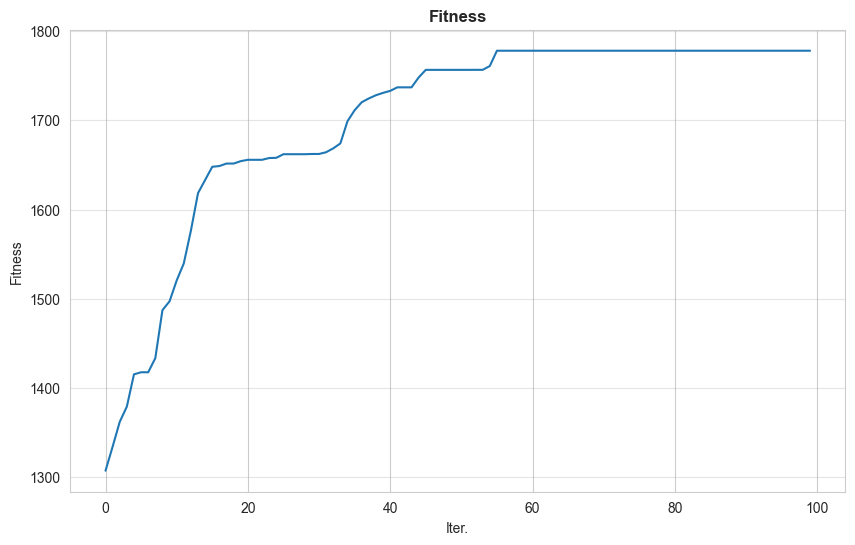

In [192]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Fitness", fontweight='bold')

# ax.set_ylim(min(global_train_hist["Fitness"]), max(global_train_hist["Fitness"]))
    
sns.lineplot(ax=ax,
             data=training_history,
             x="Iteration",
             y="Fitness",
             legend=True)

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.set_xlabel("Iter.")
ax.set_ylabel("Fitness")

plt.show()
# fig.savefig(save_path, format='svg', dpi=300, bbox_inches='tight', transparent=True)

In [29]:
!snakeviz profile.pstat

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fuclm%2FPycharmProjects%2FGSA_M%2Fnotebooks%2Fprofile.pstat
^C

Bye!


In [12]:
training_history

,Iteration,Fitness,Accuracy,ExecutionTime,Discrete,Real
0,0,517.014978,0,0.003048,[],"[-4.98, 157.83, 161.92, 189.92, 11.98, 35.76, ..."
1,1,530.855183,0,0.085591,[],"[-2.7546657683245406, 157.40093372659027, 161...."
2,2,542.646939,0,0.165635,[],"[-1.4908902847345742, 157.03956686173672, 161...."
3,3,565.661258,0,0.218120,[],"[-0.08372446694929914, 152.02590705979338, 157..."
4,4,565.661258,0,0.242157,[],"[5.670225709399254, 148.90734406439034, 159.04..."
5,5,565.661258,0,0.312635,[],"[5.670225709399254, 148.90734406439034, 159.04..."
6,6,565.661258,0,0.359963,[],"[5.670225709399254, 148.90734406439034, 159.04..."
7,7,566.497557,0,0.363831,[],"[-9.771727430351225, 145.23158773598314, 153.9..."
8,8,568.721232,0,0.367587,[],"[-7.794995179434571, 143.10007102447446, 154.2..."
9,9,568.721232,0,0.370925,[],"[-9.92970600467806, 143.22751590497882, 153.84..."


In [122]:
sm.requested_times

[0, 152, 8, 30, 167, 30, 182]

In [125]:
# Get last value in column 'Real' of training_history
best_solution = training_history.iloc[-1]['Real']
best_solution

array([-10.00176371, 152.76521983,   8.88291058,  28.7549147 ,
       166.34947485,  31.05510875, 187.02456135])

In [97]:
sm.update_feasible_schedules(Solution(real=np.array(best_solution, dtype=float), discrete=np.array([])))
sm.feasible_schedules

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0,

In [98]:
S_i = sm.get_best_schedule(Solution(real=best_solution, discrete=np.array([])))
print(S_i)

sm.get_revenue(Solution(real=best_solution, discrete=S_i))

[1 1 1 1 1 1 1 0 1 1]


1902.5370350627811

In [18]:
sm.get_best_schedule(Solution(real=best_solution, discrete=np.array([])))

array([1, 1, 1])

In [120]:
sum([revenue[service]['canon'] for service in revenue])

662.75

In [20]:
training_history

,Iteration,Fitness,Accuracy,ExecutionTime,Discrete,Real
0,0,517.014978,0,0.003048,[],"[-4.98, 157.83, 161.92, 189.92, 11.98, 35.76, ..."
1,1,530.855183,0,0.085591,[],"[-2.7546657683245406, 157.40093372659027, 161...."
2,2,542.646939,0,0.165635,[],"[-1.4908902847345742, 157.03956686173672, 161...."
3,3,565.661258,0,0.218120,[],"[-0.08372446694929914, 152.02590705979338, 157..."
4,4,565.661258,0,0.242157,[],"[5.670225709399254, 148.90734406439034, 159.04..."
5,5,565.661258,0,0.312635,[],"[5.670225709399254, 148.90734406439034, 159.04..."
6,6,565.661258,0,0.359963,[],"[5.670225709399254, 148.90734406439034, 159.04..."
7,7,566.497557,0,0.363831,[],"[-9.771727430351225, 145.23158773598314, 153.9..."
8,8,568.721232,0,0.367587,[],"[-7.794995179434571, 143.10007102447446, 154.2..."
9,9,568.721232,0,0.370925,[],"[-9.92970600467806, 143.22751590497882, 153.84..."
